HDB Resale Data Analytics
===
---

Background of HDB Resale Project
---

Getting a HDB is probably one of the biggest financial decisions many Singaporeans have to make, given its exhorbitant cost. Making a wrong decision could set you back several years in terms of opportunity cost & time value of money. 

<img src='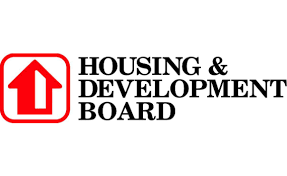
'/>

In this project, we seek to build data visualisation to shed light on the HDB resale market, and provide key consideration parameters to help us make better decisions in choosing a: <br>

(1) HDB Resale flat, or <br>
(2) BTO flats that are likely to appreciate in the resale market

Loading the Dataset
---

We start by first loading the CSV data of Singapore HDB listings (73320 rows × 14 columns) into a nested list, <code>hdb_resale_listings</code>.


In [1]:
import csv

hdb_resale_listings = []

with open('data/HDB_Resale_With_Geocoordinates.csv', newline='', encoding="utf8") as f:
    reader = csv.reader(f)
    for row in reader:
        hdb_resale_listings.append(row)

    hdb_resale_listings_headers = hdb_resale_listings[0]
    hdb_resale_listings = hdb_resale_listings[1:]
    
print(hdb_resale_listings[0]) # Print first row of data

['2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', '44', 'Improved', '1979', '61 years 04 months', '232000', '406 ANG MO KIO AVE 10', '103.8538799', '1.362004539']


For our visualisation, we display a snippet of the <code>hdb_resale_listings</code> nested list in a tabular format. 

In [2]:
import pandas as pd

hdb_resale_df = pd.read_csv("data/HDB_Resale_With_Geocoordinates.csv")
hdb_resale_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,103.857201,1.366201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,103.835132,1.381041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73315,2020-06,YISHUN,EXECUTIVE,326,YISHUN RING RD,07 TO 09,146.0,Maisonette,1988,67 years 03 months,590000.0,326 YISHUN RING RD,103.842440,1.429551
73316,2020-06,YISHUN,EXECUTIVE,281,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,64 years 02 months,583000.0,281 YISHUN ST 22,103.837501,1.438965
73317,2020-06,YISHUN,EXECUTIVE,611,YISHUN ST 61,01 TO 03,142.0,Apartment,1987,66 years 08 months,550000.0,611 YISHUN ST 61,103.836153,1.420201
73318,2020-06,YISHUN,EXECUTIVE,611,YISHUN ST 61,07 TO 09,146.0,Maisonette,1987,66 years 07 months,595000.0,611 YISHUN ST 61,103.836153,1.420201


Data Cleaning
---

We now write a loop to iterate through the data to perform some cleaning. The data columns we will be cleaning are:
- <code>floor_area_sqm</code> (convert to float)
- <code>remaining_lease</code> (extract only the years & convert it to float)
- <code>resale_price</code> (convert to float)
- <code>longitude</code> (convert to float)
- <code>latitude</code> (convert to float)


In [25]:
for row in hdb_resale_listings:
    
    floor_area_sqm = row[6]
    lease_remaining = row[9]                 
    resale_price = row[10]
    longitude = row[12]
    latitude = row[13]
    
    row[6] = float(floor_area_sqm)
    
    if isinstance(lease_remaining,str):
        row[9] = int(lease_remaining[:2]) # Get years of lease remaining with slicing, and convert it to int type
   
    row[10] = float(resale_price)
    
    if longitude == '':
        row[12] = 0
    else:
        row[12] = float(longitude)
        
    if latitude == '':
        row[13] = 0
    else:
        row[13] = float(latitude)

print(hdb_resale_listings[:5]) # Print first 5 rows of data

[['2017-01', 'ANG MO KIO', '2 ROOM', '406', 'ANG MO KIO AVE 10', '10 TO 12', 44.0, 'Improved', '1979', 61, 232000.0, '406 ANG MO KIO AVE 10', 103.8538799, 1.362004539], ['2017-01', 'ANG MO KIO', '3 ROOM', '108', 'ANG MO KIO AVE 4', '01 TO 03', 67.0, 'New Generation', '1978', 60, 250000.0, '108 ANG MO KIO AVE 4', 103.8382019, 1.370966352], ['2017-01', 'ANG MO KIO', '3 ROOM', '602', 'ANG MO KIO AVE 5', '01 TO 03', 67.0, 'New Generation', '1980', 62, 262000.0, '602 ANG MO KIO AVE 5', 103.8353682, 1.38070883], ['2017-01', 'ANG MO KIO', '3 ROOM', '465', 'ANG MO KIO AVE 10', '04 TO 06', 68.0, 'New Generation', '1980', 62, 265000.0, '465 ANG MO KIO AVE 10', 103.857201, 1.366201041], ['2017-01', 'ANG MO KIO', '3 ROOM', '601', 'ANG MO KIO AVE 5', '01 TO 03', 67.0, 'New Generation', '1980', 62, 265000.0, '601 ANG MO KIO AVE 5', 103.8351317, 1.381041355]]


For our visualisation, we display a snippet of the cleaned data stored in the variable <code>hdb_resale_listings</code> in a tabular format. 

In [4]:
hdb_resale_df = pd.DataFrame(hdb_resale_listings, columns = hdb_resale_listings_headers)
hdb_resale_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,465 ANG MO KIO AVE 10,103.857201,1.366201
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,601 ANG MO KIO AVE 5,103.835132,1.381041


***


Data Preparation & Visualisation
===
***

Calculate the Number of Resale Flats in Each Town 
---

<br>

In [6]:
resale_counts_by_town = {}  

for row in hdb_resale_listings:
    
    town = row[1]
    
    if town in resale_counts_by_town:        
        resale_counts_by_town[town] += 1  
    
    else: resale_counts_by_town[town] = 1   

import operator
print(dict(sorted(resale_counts_by_town.items(), key=operator.itemgetter(1),reverse=True)))


{'SENGKANG': 5731, 'WOODLANDS': 5585, 'JURONG WEST': 5535, 'YISHUN': 5449, 'TAMPINES': 4679, 'PUNGGOL': 4520, 'BEDOK': 3912, 'HOUGANG': 3443, 'ANG MO KIO': 3313, 'CHOA CHU KANG': 3035, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT BATOK': 2724, 'TOA PAYOH': 2425, 'PASIR RIS': 2148, 'KALLANG/WHAMPOA': 2112, 'SEMBAWANG': 1946, 'QUEENSTOWN': 1927, 'GEYLANG': 1759, 'JURONG EAST': 1627, 'CLEMENTI': 1600, 'SERANGOON': 1473, 'BISHAN': 1427, 'CENTRAL AREA': 604, 'MARINE PARADE': 430, 'BUKIT TIMAH': 207}


We next visualise the Number of Resale Flats in Each Town in a simple bar chart
---

<br>


C:\Users\User\AppData\Local\Temp\ipykernel_9980\4127530524.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(resale_town, rotation=90)


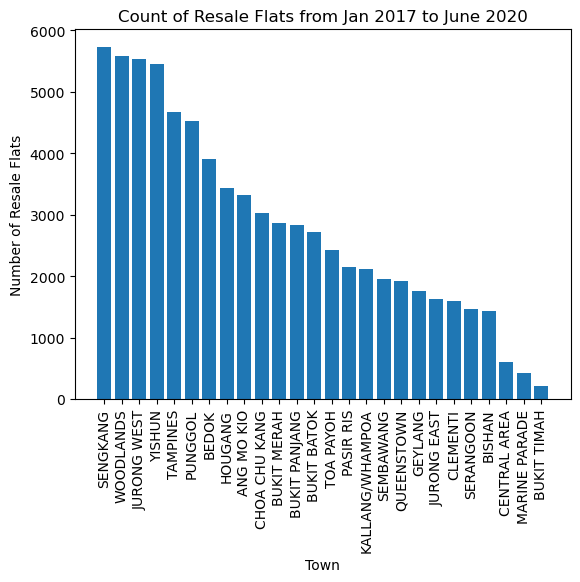

In [7]:

resale_counts_sorted_desc = {'SENGKANG': 5731, 'WOODLANDS': 5585, 'JURONG WEST': 5535, 'YISHUN': 5449, 'TAMPINES': 4679, 'PUNGGOL': 4520, 'BEDOK': 3912, 'HOUGANG': 3443, 'ANG MO KIO': 3313, 'CHOA CHU KANG': 3035, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT BATOK': 2724, 'TOA PAYOH': 2425, 'PASIR RIS': 2148, 'KALLANG/WHAMPOA': 2112, 'SEMBAWANG': 1946, 'QUEENSTOWN': 1927, 'GEYLANG': 1759, 'JURONG EAST': 1627, 'CLEMENTI': 1600, 'SERANGOON': 1473, 'BISHAN': 1427, 'CENTRAL AREA': 604, 'MARINE PARADE': 430, 'BUKIT TIMAH': 207}

import matplotlib.pyplot as plt

resale_town = list(resale_counts_sorted_desc.keys())
resale_flats = list(resale_counts_sorted_desc.values())

#------------------------
fig, ax = plt.subplots()
ax.bar(resale_town, resale_flats)

ax.set_xticklabels(resale_town, rotation=90)
ax.set_xlabel('Town')
ax.set_ylabel('Number of Resale Flats')
ax.set_title('Count of Resale Flats from Jan 2017 to June 2020')

plt.show()

We observe that developing estates such as **Sengkang, Punggol, and Woodlands** tend to have a much higher volume of resale flats compared to mature estates such as Bishan and Marine Parade, which do not have as much land parcels available for development. 

These difference in resale volume could be due to:
- **Young couples upgrading from their initial BTOs** in nearby areas (more prevalent in areas such as Sengkang, Punggol, Woodlands)
- **Potential for housing appreciation** in developing estates like Sengkang and Punggol due to new amenities being developed

We want to calculate the Total Sale Value in Each Town 
---

<br>

In [9]:
town_resale_value_total = {} 

for row in hdb_resale_listings:
    
    town = row[1]

    if town in town_resale_value_total:        
        town_resale_value_total[town] += float(row[10]) 
    
    else:        
        town_resale_value_total[town] = float(row[10])  
    
print(town_resale_value_total)


{'ANG MO KIO': 1357482312.0, 'BEDOK': 1601193885.0, 'BISHAN': 916235793.0, 'BUKIT BATOK': 1028796332.75, 'BUKIT MERAH': 1620070583.88, 'BUKIT PANJANG': 1209331600.0, 'BUKIT TIMAH': 147040354.0, 'CENTRAL AREA': 372667936.0, 'CHOA CHU KANG': 1171810776.0, 'CLEMENTI': 753674417.0, 'GEYLANG': 752338254.0, 'HOUGANG': 1485745756.88, 'JURONG EAST': 672843405.0, 'JURONG WEST': 2152691662.6400003, 'KALLANG/WHAMPOA': 1043695205.0, 'MARINE PARADE': 220658748.0, 'PASIR RIS': 1056249716.0, 'PUNGGOL': 2048804431.88, 'QUEENSTOWN': 1069608566.76, 'SEMBAWANG': 737883437.88, 'SENGKANG': 2496125484.76, 'SERANGOON': 722415279.0, 'TAMPINES': 2215182529.0, 'TOA PAYOH': 1189419991.0, 'WOODLANDS': 2105555068.88, 'YISHUN': 1977662848.0}


We want to calculate the Average Resale Value in Each Town 
---

<br>


In [10]:
# Expected output from Q1, sorted in alphabetical order
town_num_resale = {'ANG MO KIO': 3313, 'BEDOK': 3912, 'BISHAN': 1427, 'BUKIT BATOK': 2724, 'BUKIT MERAH': 2873, 'BUKIT PANJANG': 2836, 'BUKIT TIMAH': 207, 'CENTRAL AREA': 604, 'CHOA CHU KANG': 3035, 'CLEMENTI': 1600, 'GEYLANG': 1759, 'HOUGANG': 3443, 'JURONG EAST': 1627, 'JURONG WEST': 5535, 'KALLANG/WHAMPOA': 2112, 'MARINE PARADE': 430, 'PASIR RIS': 2148, 'PUNGGOL': 4520, 'QUEENSTOWN': 1927, 'SEMBAWANG': 1946, 'SENGKANG': 5731, 'SERANGOON': 1473, 'TAMPINES': 4679, 'TOA PAYOH': 2425, 'WOODLANDS': 5585, 'YISHUN': 5449}

# Expected output from Q3
town_resale_value_total = {'ANG MO KIO': 1357482312.0, 'BEDOK': 1601193885.0, 'BISHAN': 916235793.0, 'BUKIT BATOK': 1028796332.75, 'BUKIT MERAH': 1620070583.88, 'BUKIT PANJANG': 1209331600.0, 'BUKIT TIMAH': 147040354.0, 'CENTRAL AREA': 372667936.0, 'CHOA CHU KANG': 1171810776.0, 'CLEMENTI': 753674417.0, 'GEYLANG': 752338254.0, 'HOUGANG': 1485745756.88, 'JURONG EAST': 672843405.0, 'JURONG WEST': 2152691662.6400003, 'KALLANG/WHAMPOA': 1043695205.0, 'MARINE PARADE': 220658748.0, 'PASIR RIS': 1056249716.0, 'PUNGGOL': 2048804431.88, 'QUEENSTOWN': 1069608566.76, 'SEMBAWANG': 737883437.88, 'SENGKANG': 2496125484.76, 'SERANGOON': 722415279.0, 'TAMPINES': 2215182529.0, 'TOA PAYOH': 1189419991.0, 'WOODLANDS': 2105555068.88, 'YISHUN': 1977662848.0}


town_resale_average = {} # Populate this dictionary with Q4 answers

## Write your code below

for town_name, town_sales in town_resale_value_total.items():    
   
    average_resale_value = town_sales / town_num_resale[town_name]    
    town_resale_average[town_name] = round(average_resale_value)

import operator
sorted_resale = dict(sorted(town_resale_average.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_resale)


{'BUKIT TIMAH': 710340, 'BISHAN': 642071, 'CENTRAL AREA': 617000, 'BUKIT MERAH': 563895, 'QUEENSTOWN': 555064, 'MARINE PARADE': 513160, 'KALLANG/WHAMPOA': 494174, 'PASIR RIS': 491736, 'TOA PAYOH': 490482, 'SERANGOON': 490438, 'TAMPINES': 473431, 'CLEMENTI': 471047, 'PUNGGOL': 453275, 'SENGKANG': 435548, 'HOUGANG': 431527, 'GEYLANG': 427708, 'BUKIT PANJANG': 426422, 'JURONG EAST': 413548, 'ANG MO KIO': 409744, 'BEDOK': 409303, 'JURONG WEST': 388924, 'CHOA CHU KANG': 386099, 'SEMBAWANG': 379180, 'BUKIT BATOK': 377679, 'WOODLANDS': 377002, 'YISHUN': 362941}


We want to visualise the Average Resale Value in Each Town in a simple bar chart
---


C:\Users\User\AppData\Local\Temp\ipykernel_9980\2628882671.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(town_avg_list, rotation=90)


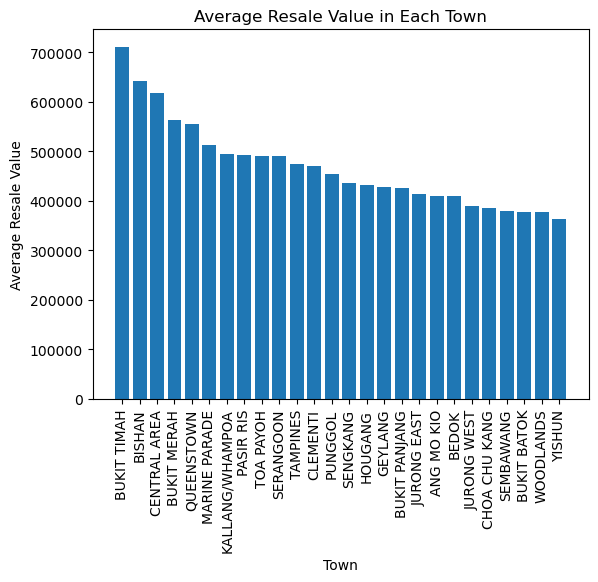

In [11]:
town_resale_average = {'BUKIT TIMAH': 710340, 'BISHAN': 642071, 'CENTRAL AREA': 617000, 'BUKIT MERAH': 563895, 'QUEENSTOWN': 555064, 'MARINE PARADE': 513160, 'KALLANG/WHAMPOA': 494174, 'PASIR RIS': 491736, 'TOA PAYOH': 490482, 'SERANGOON': 490438, 'TAMPINES': 473431, 'CLEMENTI': 471047, 'PUNGGOL': 453275, 'SENGKANG': 435548, 'HOUGANG': 431527, 'GEYLANG': 427708, 'BUKIT PANJANG': 426422, 'JURONG EAST': 413548, 'ANG MO KIO': 409744, 'BEDOK': 409303, 'JURONG WEST': 388924, 'CHOA CHU KANG': 386099, 'SEMBAWANG': 379180, 'BUKIT BATOK': 377679, 'WOODLANDS': 377002, 'YISHUN': 362941}

town_avg_list = list(town_resale_average.keys())
average_list = list(town_resale_average.values())

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(town_avg_list, average_list)

ax.set_xticklabels(town_avg_list, rotation=90)
ax.set_xlabel('Town')
ax.set_ylabel('Average Resale Value')
ax.set_title('Average Resale Value in Each Town')

plt.show()


Unsurprisingly, **HDB flats in central areas like Bukit Timah and Bishan have some of the highest resale values**. The convenience of living in these areas also contribute to the huge demand of BTO flats there; getting a BTO in these areas is almost like striking the lottery!

One interesting observation is the surprisingly high resale value of Punggol flats relative to other towns. While some may have the impression that Punggol flats are inaccessible and not desirable, the average resale value tells a different story. Observe that Punggol's resale value is markedly higher than areas like Ang Mo Kio and Bedok. In addition, the average resale value of Punggol flats is not that far off from matured estates like Clementi, Tampines & Serangoon.

A potential follow-up visualisation would be a time-series analysis of the Punggol HDB resale values over the years, and one might discover significant capital appreciation opportunities for Punggol BTO owners in the resale market!
<p>
<p>

We want to know if the Lease is an Important Factor in the HDB Resale Price 
---

<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- Some claim that HDB is an appreciating asset, yet, you often wonder how this can be true when the remaining lease period of HDB flats shortens over the years.
- We want to visualise the relationship between HDB resale prices and remaining lease periods using a line plot, to assess if lease remaining could serve as an important consideration factor when buying a HDB for investment.

</div>    

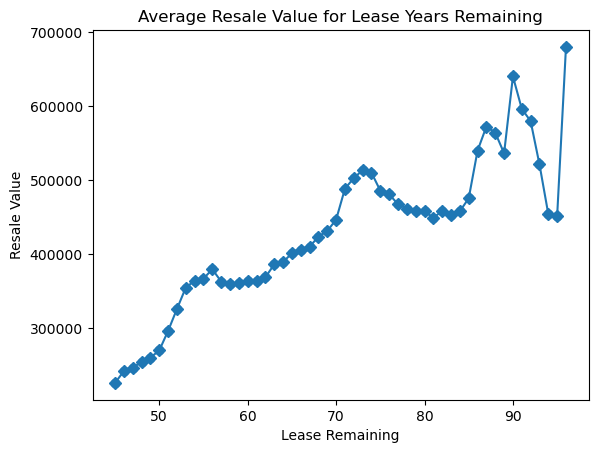

In [12]:
average_resale_for_lease_year_remaining = {45: 226042, 46: 242145, 47: 246401, 48: 254636, 49: 260232, 50: 269885, 51: 296375, 52: 325913, 53: 354740, 54: 364082, 55: 366896, 56: 379482, 57: 362915, 58: 358926, 59: 361077, 60: 363807, 61: 363912, 62: 368609, 63: 386043, 64: 389136, 65: 401178, 66: 405131, 67: 409869, 68: 423459, 69: 431147, 70: 446439, 71: 488230, 72: 502543, 73: 513224, 74: 509820, 75: 485555, 76: 480516, 77: 467435, 78: 461030, 79: 457907, 80: 458187, 81: 448684, 82: 458495, 83: 452845, 84: 457780, 85: 475330, 86: 539646, 87: 572114, 88: 563815, 89: 536062, 90: 639708, 91: 596058, 92: 579430, 93: 521120, 94: 453963, 95: 451161, 96: 679590}

lease = list(average_resale_for_lease_year_remaining.keys())
average_resale_value = list(average_resale_for_lease_year_remaining.values())

fig, ax = plt.subplots()

ax.scatter(lease,average_resale_value)
ax.plot(lease,average_resale_value, marker='D', linestyle='solid')

ax.set_xlabel("Lease Remaining")                      
ax.set_ylabel("Resale Value")  
ax.set_title("Average Resale Value for Lease Years Remaining")
plt.show()


Despite Minister Mah Bow Tan's [sweeping claim](https://omh.sg/blog/post/minister-lawrence-wongs-comments-how-story-unfolded) in 2011 that HDB is an asset that will appreciate in value over time, the above chart clearly shows that this is a flawed notion. This line plot illustrates a close correlation between the remaining lease period and the resale value of flats sold after 2017, which can be corroborated with Minister Lawrence Wong's [blog post](https://mndsingapore.wordpress.com/2017/03/24/choosing-a-home-for-life/) in March 2017. If you are looking for a resale flat, it is important to exercise caution for HDB resale flats with short leases.

Another observation from this chart is that, BTO owners who sell their flats near the Minimum Occupancy Period (MOP), with about 90 years of lease remaining, are likely to gain maximum resale value out of on their subsidised flats!
<p>
<p>

We want to investigate examine and visualise the relationship between floor area and HDB resale prices in a simple table.
---

<br>

In [13]:
hdb_resale_df.head(3)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,406 ANG MO KIO AVE 10,103.853880,1.362005
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,108 ANG MO KIO AVE 4,103.838202,1.370966
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,602 ANG MO KIO AVE 5,103.835368,1.380709


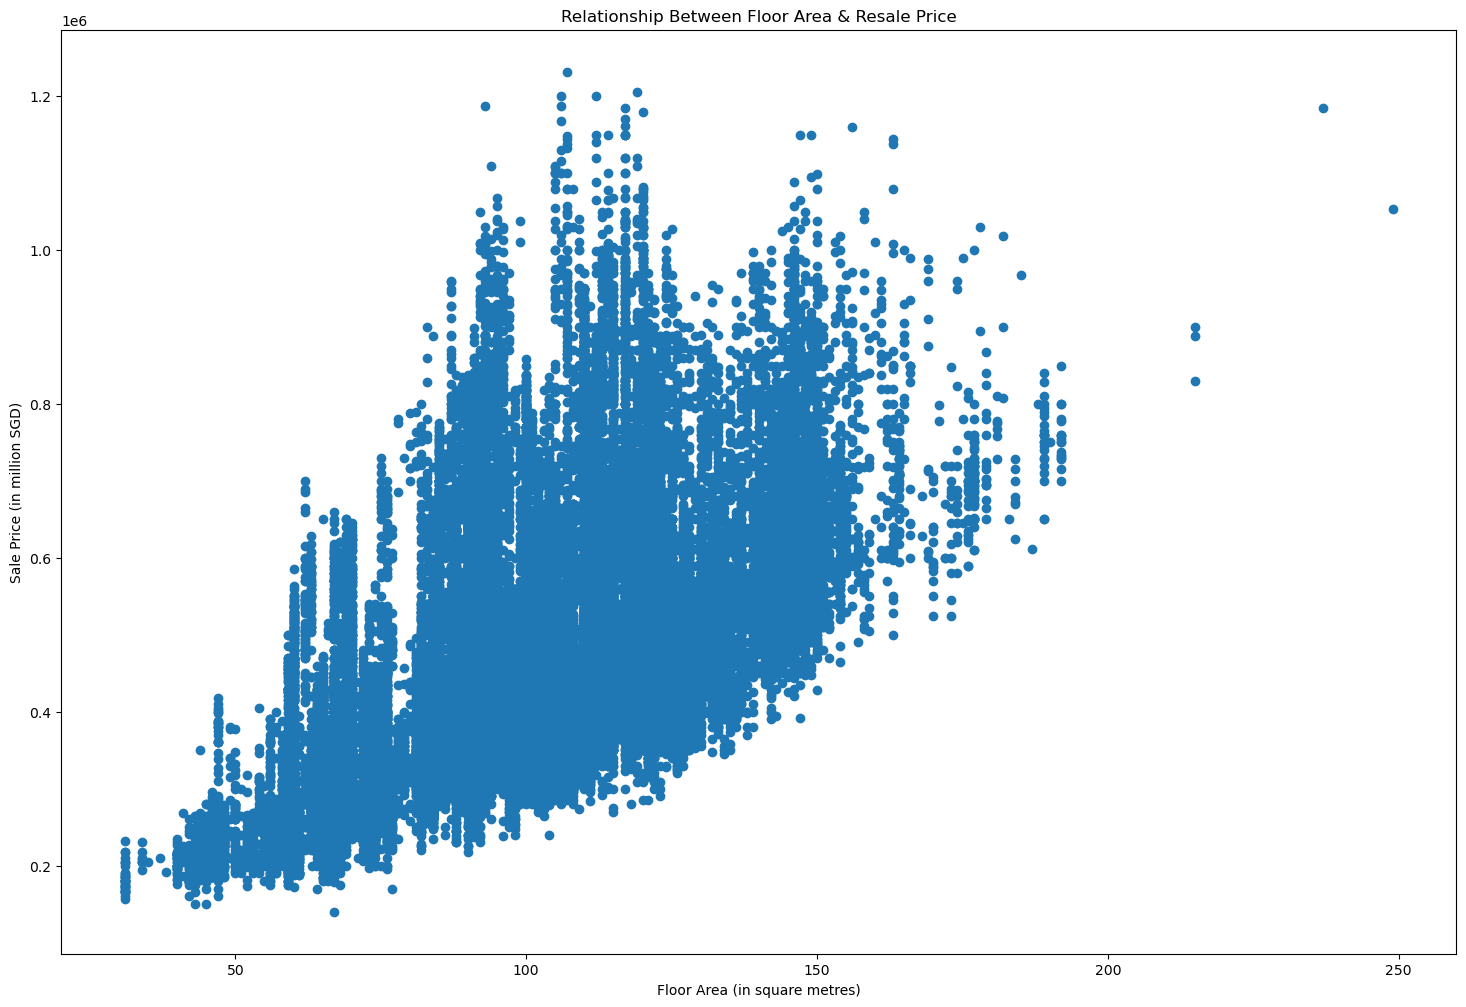

In [14]:
floor_area_sqm = []
resale_price = []

for row in hdb_resale_listings:
    floor_area_sqm.append(row[6])
    resale_price.append(row[10])

fig, ax = plt.subplots(figsize=(18,12))

scatter_plot_obj = ax.scatter(floor_area_sqm, resale_price)

plt.title('Relationship Between Floor Area & Resale Price')

plt.xlabel('Floor Area (in square metres)')
plt.ylabel('Sale Price (in million SGD)')

plt.show()


The scatterplot above shows that <b>floor area is closely and positively correlated with HDB resale prices</b>, with some variance that can likely be attributed to their locations (as investigated above). If you're looking for a large HDB flat, be prepared to pay!
<p>

Comparing Selected 4 Room Flats in Singapore 
---
<br>

<div class="alert alert-block alert-info">
    
<b>Background:</b>
    
- I am interested in buying a 4-room flat and have shortlisted a few housing estates of interest: Punggol, Tampines, Woodlands, Clementi and Yishun. As such, I wish to investigate the price distribution of 4-room HDB resale flats in these select towns.
    
</div>

In [15]:
punggol = []
tampines = []
woodlands = []
clementi = []
yishun = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':        
        town = row[1]        
        if town == 'PUNGGOL':
            punggol.append(row[10])
            
        elif town == 'TAMPINES':
            tampines.append(row[10])
            
        elif town == 'WOODLANDS':
            woodlands.append(row[10])
            
        elif town == 'CLEMENTI':
            clementi.append(row[10])
            
        elif town == 'YISHUN':
            yishun.append(row[10])  

print(punggol[:5])
print(tampines[:5])
print(woodlands[:5])
print(clementi[:5])
print(yishun[:5])

[350000.0, 370000.0, 370000.0, 380000.0, 408000.0]
[370000.0, 385000.0, 394000.0, 395000.0, 398000.0]
[288000.0, 295000.0, 300000.0, 306000.0, 323000.0]
[385000.0, 397000.0, 425000.0, 440000.0, 461000.0]
[300000.0, 300000.0, 305000.0, 310000.0, 315000.0]


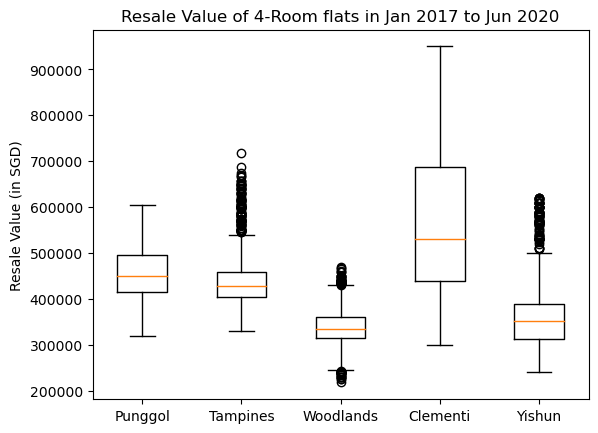

In [16]:
fig, ax = plt.subplots()
ax.boxplot([punggol, tampines, woodlands, clementi, yishun])

ax.set_xticklabels(["Punggol", "Tampines", "Woodlands", "Clementi", "Yishun"])  
ax.set_ylabel("Resale Value (in SGD)")

plt.title('Resale Value of 4-Room flats in Jan 2017 to Jun 2020')

plt.show()

From the boxplot, we see that **4-room resale flats in Clementi tend to cost more and can have a huge variance in price**. If you're on a very tight budget, a resale flat in Woodlands may be the optimal choice. 4-room resales flats in Punggol and Tampines have similar prices, so **it would be helpful to zoom into Punggol & Tampines estates and compare the amenities available** to specific flats and sub-areas in each town, in order to make a more informed decision. 

<br>

We want to construct a Heatmap to visualise the density of 4-rooms HDB resale listings across different towns in Singapore.
---


In [20]:
import folium
from folium.plugins import HeatMap

lat_long_4_room = []

for row in hdb_resale_listings:
    
    if row[2] == '4 ROOM':
        lat_long_4_room.append([row[13],row[12]])
    
map_folium = folium.Map([1.357,103.826], height=350, width=800, zoom_start=11.4)

HeatMap(lat_long_4_room, radius=8, gradient={0.2:'blue', 0.4:'purple', 0.6:'orange', 1.0:'red'}).add_to(map_folium)

display(map_folium)

<p>

We next construct a Folium Marker Cluster to visualise the geographical distribution & resales prices of all 4-rooms HDB resale listings in Singapore. 
---


In [ ]:
from folium.plugins import MarkerCluster

def extract_lat_long_price(database, room_type):
    
    lat_long_4_room = []
    resale_price = []

    for row in database:        
        if row[2] == room_type:
            lat_long_4_room.append([row[13],row[12]])
            resale_price.append(row[10])      
    return lat_long_4_room, resale_price

lat_long_4_room, resale_price = extract_lat_long_price(hdb_resale_listings, '4 ROOM')


from folium.plugins import MarkerCluster

map_folium = folium.Map([1.357,103.826], height=550, width=900, zoom_start=11.5)

marker_cluster = MarkerCluster().add_to(map_folium)


for i in range(0,len(lat_long_4_room)):
    
    lat_long_of_one_listing = lat_long_4_room[i]    
    pop_display_price = '$' + str(resale_price[i]) 
        
    folium.Marker(
        location=lat_long_of_one_listing,
        popup=pop_display_price,
        icon=None,
    ).add_to(marker_cluster)

display(map_folium)
